# InceptionV3 Model on cifar10 Dataset

#### Importing Necessary Libraries

In [1]:
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16,resnet50
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D

Using TensorFlow backend.


#### Loading the Dataset
    - Importing from cifar10 library
    - One Hot Encoding the labels/(y)
    - Applying Preliminary preprocessing provided by inceptionv3 library
    
    

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray().astype(int)
y_test = ohe.transform(y_test).toarray().astype(int)
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [4]:
print( X_train.shape, y_train.shape,  X_test.shape, y_test.shape )

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


#### Additional Preprocessing
    - Resizing each image in dataset to suit the model (139,139,3)

In [0]:
def resize_data(data):
    data_upscaled = []
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(139, 139))
        data_upscaled.append(large_img)
    return data_upscaled

In [0]:
X_train_new = np.array(resize_data(X_train))
X_test_new = np.array(resize_data(X_test)) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.5372549  -0.5137255  -0.5058824 ]
  [-0.6627451  -0.6392157  -0.64705884]
  [-0.60784316 -0.62352943 -0.6627451 ]
  ...
  [ 0.23921573  0.03529418 -0.15294117]
  [ 0.19215691 -0.01960784 -0.19999999]
  [ 0.16078436 -0.02745098 -0.19215685]]

 [[-0.8745098  -0.84313726 -0.84313726]
  [-1.         -1.         -1.        ]
  [-0.85882354 -0.9372549  -1.        ]
  ...
  [-0.03529412 -0.3098039  -0.5686275 ]
  [-0.06666666 -0.3490196  -0.60784316]
  [-0.04313725 -0.31764704 -0.5529412 ]]

 [[-0.8039216  -0.8117647  -0.8352941 ]
  [-0.8745098  -0.94509804 -1.        ]
  [-0.6156863  -0.7882353  -0.9372549 ]
  ...
  [-0.0745098  -0.34117645 -0.60784316]
  [-0.05882353 -0.34117645 -0.60784316]
  [-0.14509803 -0.42745095 -0.67058825]]

 ...

 [[ 0.6313726   0.33333337 -0.24705881]
  [ 0.5764706   0.20000005 -0.73333335]
  [ 0.5529412   0.26274514 -0.79607844]
  ...
  [ 0.254902    0.04313731 -0.45098037]
  [-0.56078434 -0.75686276 -0.94509804]
  [-0.58431375 -0.73333335 -0.84313726]]

 [

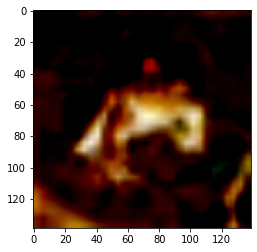

In [8]:
import matplotlib.pyplot as plt
print(X_train)
plt.imshow(X_train_new[0])

#### Model Building
    - Base Model will be InceptionV3
    - We will remove the last layer and add our set of new layers for classifying the 10 labels in cifar10

In [8]:
base = InceptionV3(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(Conv2D(filters=100, kernel_size=2))
model.add(Dropout(0.4))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

87916544/87910968 [==============================] - 1s 0us/step


###### Important task
Freezing the layers in the base model, to reduce humongous training time!

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
#Compiing Model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
#Fitting the model
model.fit(X_train_new,y_train,epochs=10,batch_size=100,validation_data=(X_test_new,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 238s 5ms/step - loss: 3.3929 - accuracy: 0.5410 - val_loss: 4.9924 - val_accuracy: 0.6046
Epoch 2/10
50000/50000 [==============================] - 235s 5ms/step - loss: 1.3367 - accuracy: 0.6524 - val_loss: 1.5457 - val_accuracy: 0.7470
Epoch 3/10
50000/50000 [==============================] - 236s 5ms/step - loss: 1.0014 - accuracy: 0.6839 - val_loss: 1.1382 - val_accuracy: 0.7690
Epoch 4/10
50000/50000 [==============================] - 235s 5ms/step - loss: 0.9206 - accuracy: 0.7051 - val_loss: 1.5023 - val_accuracy: 0.7156
Epoch 5/10
50000/50000 [==============================] - 234s 5ms/step - loss: 0.8853 - accuracy: 0.7127 - val_loss: 1.3155 - val_accuracy: 0.7464
Epoch 6/10
50000/50000 [==============================] - 234s 5ms/step - loss: 0.8569 - accuracy: 0.7239 - val_loss: 1.3194 - val_accuracy: 0.7488
Epoch 7/10
50000/50000 [==============================] - 234s

### Final Result
    - Train Data Accuracy : 74.28%
    - Test Data Accuracy : 74.29%